## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market.For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisationin in order to predict
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

### Steps that we follow-
1. Data Understanding & Exploration
2. Data Cleaning
3. EDA and Initial Inference identification
4. Data Preparation
5. Model Building(Lasso & Ridge)
6. Model Evaluation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
%matplotlib inline

In [3]:
# Reading the dataset

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
aus_house = pd.read_csv(r'D:\Download folder\Machine Learning 2\Advance Regression\Assignment_AR\train.csv')
aus_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Info of dataset
aus_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking Null percentage column wise

null_value = round(aus_house.isnull().sum()/len(aus_house.index),2)*100
null_value.sort_values(ascending=False)

PoolQC           100.0
MiscFeature       96.0
Alley             94.0
Fence             81.0
FireplaceQu       47.0
LotFrontage       18.0
GarageType         6.0
GarageCond         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageQual         6.0
BsmtFinType1       3.0
BsmtExposure       3.0
BsmtCond           3.0
BsmtQual           3.0
BsmtFinType2       3.0
MasVnrArea         1.0
MasVnrType         1.0
Exterior2nd        0.0
Exterior1st        0.0
OverallCond        0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
RoofMatl           0.0
RoofStyle          0.0
YearRemodAdd       0.0
YearBuilt          0.0
SalePrice          0.0
OverallQual        0.0
HouseStyle         0.0
BldgType           0.0
Condition2         0.0
Condition1         0.0
Neighborhood       0.0
LandSlope          0.0
LotConfig          0.0
Utilities          0.0
LandContour        0.0
LotShape           0.0
Street             0.0
LotArea            0.0
MSZoning           0.0
MSSubClass 

#### Imputing value to columns having high null percentage put the analysis in a wrong direction. So better to drop those columns

In [6]:
# Dropping columns which have null percentage greater than 40%
aus_house.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [7]:
aus_house.shape

(1460, 76)

In [8]:
# Again Null Checking
null_value = round(aus_house.isnull().sum()/len(aus_house.index),2)*100
null_value.sort_values(ascending=False)

LotFrontage      18.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageCond        6.0
GarageQual        6.0
BsmtFinType1      3.0
BsmtExposure      3.0
BsmtCond          3.0
BsmtQual          3.0
BsmtFinType2      3.0
MasVnrType        1.0
MasVnrArea        1.0
RoofMatl          0.0
RoofStyle         0.0
SalePrice         0.0
Exterior1st       0.0
Exterior2nd       0.0
YearBuilt         0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
YearRemodAdd      0.0
BldgType          0.0
OverallCond       0.0
OverallQual       0.0
HouseStyle        0.0
Condition2        0.0
Condition1        0.0
Neighborhood      0.0
LandSlope         0.0
LotConfig         0.0
Utilities         0.0
LandContour       0.0
LotShape          0.0
Street            0.0
LotArea           0.0
MSZoning          0.0
MSSubClass        0.0
BsmtFinSF1        0.0
TotalBsmtSF       0.0
BsmtFinSF2        0.0
EnclosedPorch     0.0
Fireplaces        0.0
GarageCars        0.0
GarageArea

In [9]:
aus_house.select_dtypes(include=['object']).columns  # Only Object column, for value count....

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
aus_house.SaleCondition.value_counts(dropna=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

After doing value counts of each object columns, filling the null value for those columns, showing null counts.

In [11]:
# Null value fill-up for object columns
aus_house.MasVnrType.fillna('None',inplace=True)
aus_house.BsmtQual.fillna('No Basement',inplace=True)
aus_house.BsmtCond.fillna('No Basement',inplace=True)
aus_house.BsmtExposure.fillna('No Basement',inplace=True)
aus_house.BsmtFinType1.fillna('No Basement',inplace=True)
aus_house.BsmtFinType2.fillna('No Basement',inplace=True)
aus_house.GarageType.fillna('No Garage',inplace=True)
aus_house.GarageFinish.fillna('No Garage',inplace=True)
aus_house.GarageQual.fillna('No Garage',inplace=True)
aus_house.GarageCond.fillna('No Garage',inplace=True)
aus_house.Electrical.fillna('SBrkr', inplace=True)

In [12]:
#Final checking of null percentage after imputation( only Object )
round(100*(aus_house.select_dtypes(include=['object']).isnull().sum()/len(aus_house.select_dtypes(include=['object']).index)), 2)

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

Now all the object columns are clean and no null count is showing.

In [13]:
# Checking of Numeric column for null percentage
round(100*(aus_house.select_dtypes(include=['float64','int64']).isnull().sum()/len(aus_house.select_dtypes(include=['float64','int64']).index)), 2)

Id                0.00
MSSubClass        0.00
LotFrontage      17.74
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageYrBlt       5.55
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SalePrice         0.00
dtype: float64

In [14]:
aus_house.select_dtypes(include=['float64','int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
# imputing the null percentage for numeric columns
aus_house.LotFrontage.fillna(aus_house.LotFrontage.mean(),inplace=True)
aus_house.GarageYrBlt.fillna(aus_house.GarageYrBlt.max(), inplace=True)
aus_house.MasVnrArea.fillna(aus_house.MasVnrArea.mean(),inplace=True)

In [16]:
# Checking entry value for each numeric column
aus_house['MiscVal'].value_counts(dropna=False)

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

**After cheching each numeric & object column, we are going to drop some columns as these columns basically centralized with one value representation. So these columns does not create any big impact for the analysis as no versatality established.**

In [17]:
# Dropping some Columns
aus_house.drop(['Street','Utilities','Condition2','CentralAir','BsmtFinSF2','3SsnPorch', 'RoofMatl','BsmtFinSF1','BsmtUnfSF',
               'ScreenPorch','PoolArea'], axis=1, inplace=True)

In [18]:
# Final checking of null value
aus_house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea  

In [19]:
aus_house.shape

(1460, 65)

In [20]:
# Row-wise null Checking
aus_house.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


**There is no null value present niether as column wise nor Row wise. So the data is clean now. Lets so some EDA**

### EDA ANALYSIS

#### Bivariate Analysis

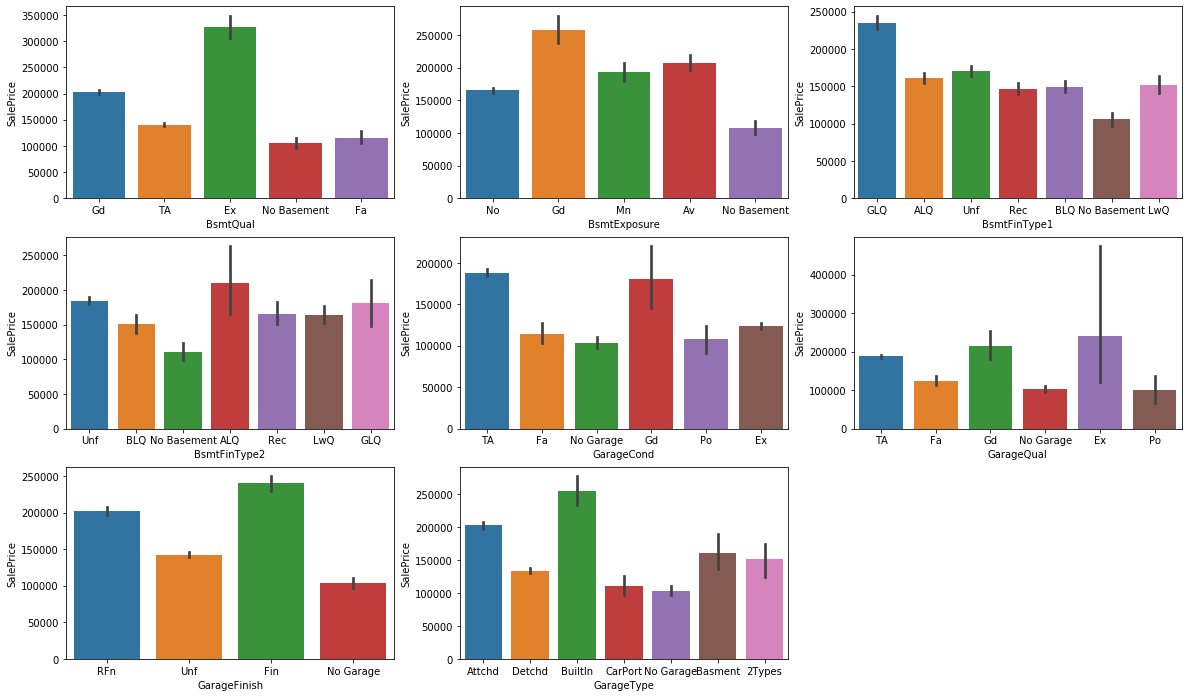

In [21]:
# Plotting Categorical Variables related to Basement and Garage with Target variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'BsmtQual', y = 'SalePrice', data = aus_house)
plt.subplot(3,3,2)
sns.barplot(x = 'BsmtExposure', y = 'SalePrice', data = aus_house)
plt.subplot(3,3,3)
sns.barplot(x = 'BsmtFinType1',y = 'SalePrice', data = aus_house)
plt.subplot(3,3,4)
sns.barplot(x = 'BsmtFinType2',y = 'SalePrice', data = aus_house)
plt.subplot(3,3,5)
sns.barplot(x = 'GarageCond', y = 'SalePrice', data=aus_house)
plt.subplot(3,3,6)
sns.barplot(x = 'GarageQual', y = 'SalePrice', data=aus_house)
plt.subplot(3,3,7)
sns.barplot(x = 'GarageFinish', y = 'SalePrice', data=aus_house)
plt.subplot(3,3,8)
sns.barplot(x = 'GarageType', y = 'SalePrice', data=aus_house)
plt.show()

##### Reference can conclude from above graph

- SalePrice getting high when basement quality is in Excellent condition and subsiquently `SalePrice` dropping according to the quality and if the house does'nt have basement, Sale Price became low.
- Same kind of visualization we can observe for `Basement Exposure` as like as `Basement Quality`. As Exposure is good, Sale Price become High and subsequently getting down.
- `BasementFinType1` slightly different scenario we can observed. For `Unfinished` type of basement Sale Price is still moderatly high as compared to Average Quality or Below Quality. 
- `BasementFinType2`, Here is also we can observed that Average Quality type's Sale is high as compared to other Qualiyu type for multi layer Basement. So we can predict that the customers are more concern about the first layer of Basement very much.
- From various Garage Attributes, we can say that the customers are not very much concern about the type or quality of Garage, They basically want whether the Garage has or not. And if the house has an in-built garage with interior finish then autometically that house became a first choice for the customers.

In [22]:
aus_house_new = aus_house.copy()

In [23]:
# Creating Bin for Year columns
bins=[1872,1925,1950,1976,1991,2001,2010]
slot = ['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
aus_house_new['YearBuilt_range'] = pd.cut(aus_house_new['YearBuilt'],bins,labels=slot)

In [24]:
bins=[1872,1925,1950,1976,1991,2001,2010]
slot = ['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
aus_house_new['YearRemod_range'] = pd.cut(aus_house_new['YearRemodAdd'],bins,labels=slot)

In [25]:
bins = [2000,2002,2004,2006,2008,2010]
slot = ['2000-2002','2002-2004','2004-2006','2006-2008','2008-2010']
aus_house_new['YearSold_Range'] = pd.cut(aus_house_new['YrSold'],bins, labels=slot)

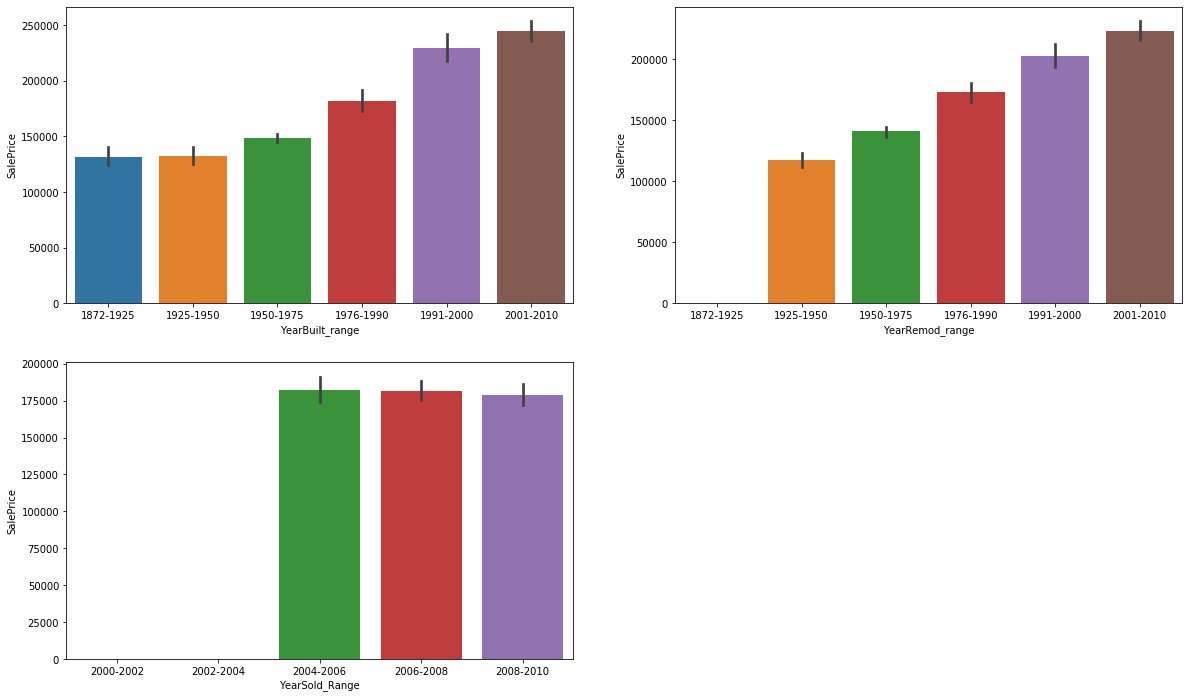

In [26]:
# bar Plot for Year Column
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x='YearBuilt_range',y='SalePrice', data=aus_house_new)
plt.subplot(2,2,2)
sns.barplot(x='YearRemod_range', y='SalePrice', data=aus_house_new)
plt.subplot(2,2,3)
sns.barplot(x='YearSold_Range',y='SalePrice', data= aus_house_new)
plt.show()

- As the country become mordenized the sale of house became higher as compared to privious year and demad of remodelling also getting high. And before 2004, there is no sold of house is observed.

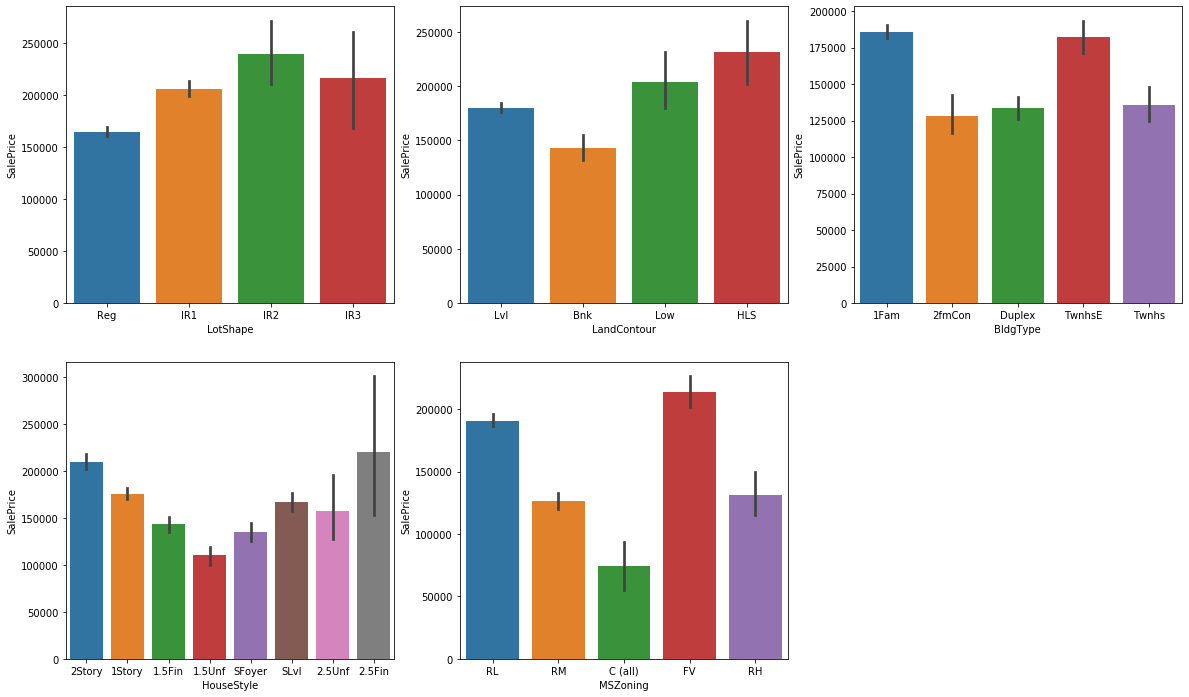

In [27]:
# Another few columns' Variation with Target Variable
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='LotShape', y='SalePrice', data=aus_house)
plt.subplot(2,3,2)
sns.barplot(x='LandContour', y='SalePrice', data=aus_house)
plt.subplot(2,3,3)
sns.barplot(x='BldgType', y='SalePrice', data=aus_house)
plt.subplot(2,3,4)
sns.barplot(x='HouseStyle', y='SalePrice', data=aus_house)
plt.subplot(2,3,5)
sns.barplot(x='MSZoning', y='SalePrice', data=aus_house)
plt.show()

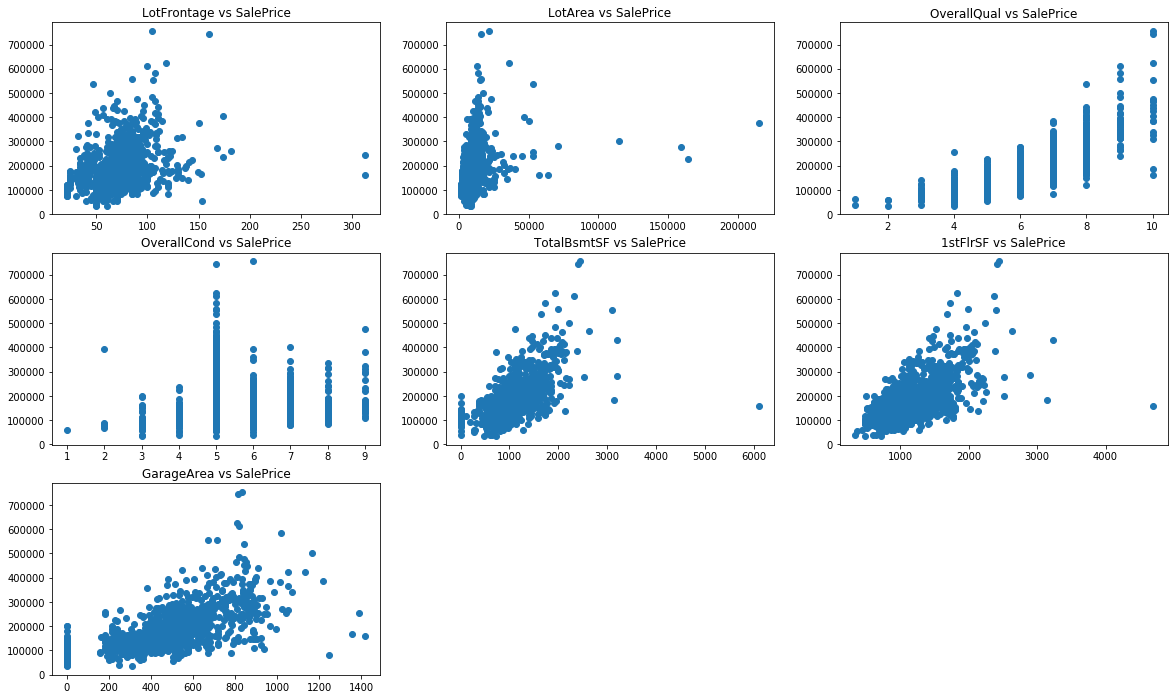

In [28]:
# Scatter plot...
## To understand the linearity with Target columns if there any.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
plt.scatter(x='LotFrontage', y='SalePrice', data=aus_house)
plt.title('LotFrontage vs SalePrice')

plt.subplot(3,3,2)
plt.scatter(x='LotArea', y='SalePrice', data=aus_house)
plt.title('LotArea vs SalePrice')

plt.subplot(3,3,3)
plt.scatter(x='OverallQual', y='SalePrice', data=aus_house)
plt.title('OverallQual vs SalePrice')

plt.subplot(3,3,4)
plt.scatter(x='OverallCond', y='SalePrice', data=aus_house)
plt.title('OverallCond vs SalePrice')

plt.subplot(3,3,5)
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=aus_house)
plt.title('TotalBsmtSF vs SalePrice')

plt.subplot(3,3,6)
plt.scatter(x='1stFlrSF', y='SalePrice', data=aus_house)
plt.title('1stFlrSF vs SalePrice')

plt.subplot(3,3,7)
plt.scatter(x='GarageArea', y='SalePrice', data=aus_house)
plt.title('GarageArea vs SalePrice')
plt.show()

- From the above scatter plot, it is seen that most of Sale are commenced with low linear distance from street that connect the property.
- Most of the Sale is restricted between 0-35000 sq ft(roughly) for LotArea.
- As the  overall quality of the increases Sale become increases. There is a linearity with the SalePrice.
- There is a linearity observed with the SalePrice for Total Square Feet of the Basement, 1st floor Sq Ft and GarageArea.

### Univariate Analysis

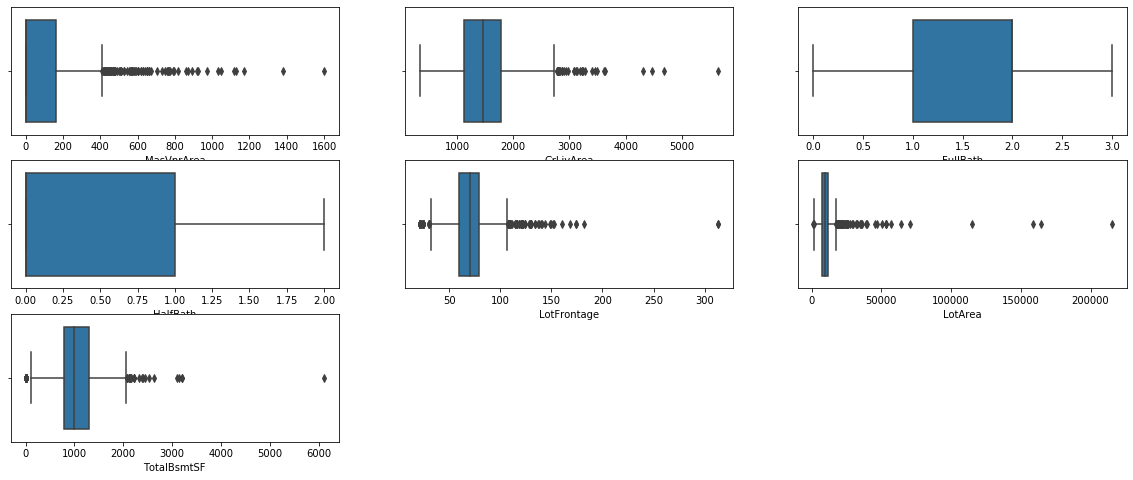

In [29]:
# Box Plot for outliers checking..
plt.figure(figsize=(20, 8))
plt.subplot(3,3,1)
sns.boxplot(aus_house.MasVnrArea)           # MasvnrArea
plt.subplot(3,3,2)
sns.boxplot(aus_house.GrLivArea)            # GrLiveArea
plt.subplot(3,3,3)
sns.boxplot(aus_house.FullBath)             # FullBath
plt.subplot(3,3,4)
sns.boxplot(aus_house.HalfBath)             # half Bath
plt.subplot(3,3,5)
sns.boxplot(aus_house.LotFrontage)          # Lot Frontage
plt.subplot(3,3,6)
sns.boxplot(aus_house.LotArea)              # Lot Area
plt.subplot(3,3,7)
sns.boxplot(aus_house.TotalBsmtSF)          # Total Basement Square Feet
plt.show()

- from above boxplot analysis it is seen that there are lot of outliers in various attributes.
- Insteed of doing several plotting, lets have a look at describe to understand which attributes to be capped for outliers treatment.

In [30]:
aus_house.select_dtypes(include=['float64','int64']).describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1980.253425,1.767123,472.980137,94.244521,46.660274,21.954110,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,25.054953,0.747315,213.804841,125.338794,66.256028,61.119149,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# Lets Capping columns which have outliers
numeric_col= ['MSSubClass','LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','MiscVal',
             '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']
def drop_outlier(x):
    list=[]
    for col in numeric_col:
        IQ1 = x[col].quantile(0.01)
        IQ2 = x[col].quantile(0.95)
        IQR = IQ2 - IQ1
        x = x[(x[col]>= (IQ1 - (1.5*IQR))) & (x[col] <= (IQ2 + (1.5*IQR)))]
    return x

aus_house = drop_outlier(aus_house)

In [32]:
aus_house.shape

(1365, 65)

In [33]:
# Checking how much data still have retain
print(len(aus_house.index)/1460)

0.934931506849315


So after capping still we have 93.5% data which is quite good analysis.

In [34]:
aus_house.select_dtypes(include=['float64','int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
# Doing Pairplot for Numeric columns
sns.pairplot(aus_house[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath','SalePrice']])
plt.show()

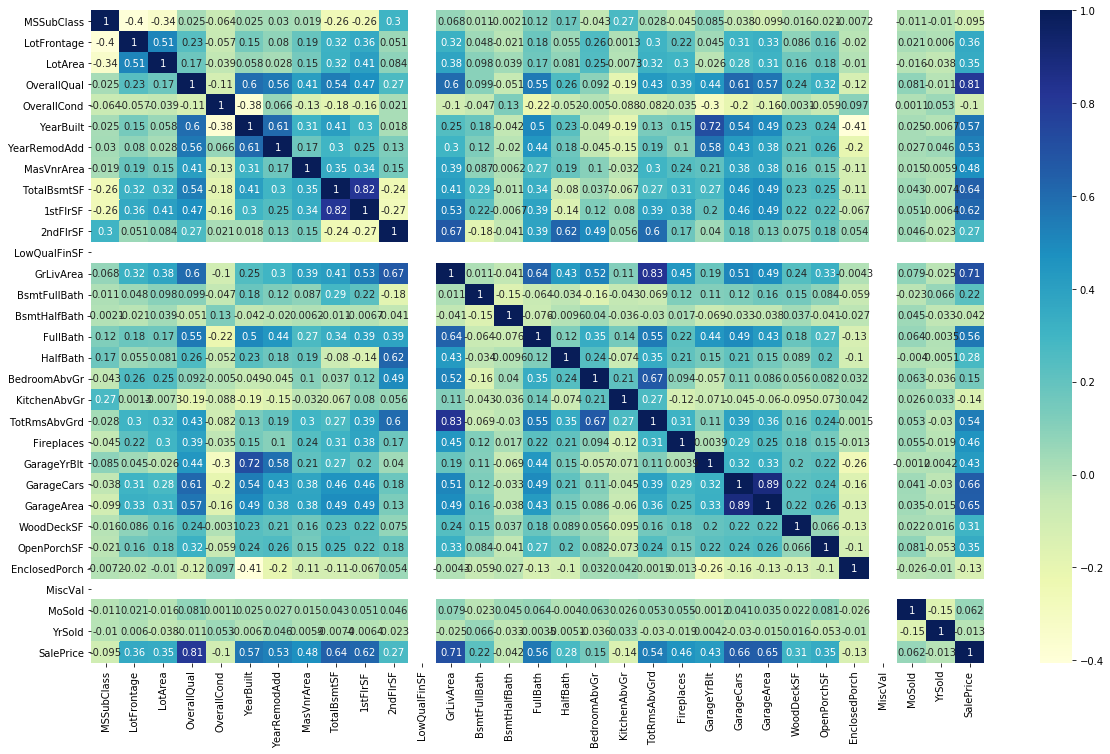

In [36]:
# Plotting Heatmap to understand correlations
plt.figure(figsize=(20,12))
sns.heatmap(aus_house[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','MiscVal', 'MoSold',
       'YrSold', 'SalePrice']].corr(), cmap='YlGnBu', annot=True)
plt.show()

 There is lot of feature to which the correlation is comparatively high with the target variable like- `OverallQual`, `TotalBsmtSF`, `GrLiveArea`, `GarageCars`, `GarageArea` etc..

In [37]:
# Lets Drop LowQualFinSF & MiscVal along with Id column as this has no requirement for analysis
aus_house.drop(['Id','LowQualFinSF','MiscVal'], axis=1, inplace=True)

In [38]:
aus_house.shape

(1365, 62)

In [39]:
# Lets Create New Features
## Convert various type of year related column to its actual age
aus_house['YearBuilt_age'] = aus_house.YearBuilt.max()-aus_house.YearBuilt
aus_house['YearRemodAdd_age'] = aus_house.YearRemodAdd.max()-aus_house.YearRemodAdd
aus_house['GarageYrBlt_age'] = aus_house.GarageYrBlt.max()-aus_house.GarageYrBlt
aus_house['YrSold_age'] = aus_house.YrSold.max()-aus_house.YrSold
aus_house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_age','YearRemodAdd_age',
             'GarageYrBlt_age','YrSold_age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
191,1972,2004,1972.0,2007,38,6,38.0,3
1177,1926,2004,1926.0,2009,84,6,84.0,1
505,1952,1952,1952.0,2009,58,58,58.0,1
1119,1959,1959,1959.0,2006,51,51,51.0,4
651,1940,1950,1940.0,2009,70,60,70.0,1
447,1998,1999,1998.0,2006,12,11,12.0,4
496,1992,1993,1992.0,2007,18,17,18.0,3
476,1997,1998,1997.0,2008,13,12,13.0,2
1377,1941,1960,1977.0,2009,69,50,33.0,1
679,1961,1961,1963.0,2007,49,49,47.0,3


######  There are lots of Year related columns which doen't create any significant impact for analysis. So there is no point of need to retain these columns. Lets drop the actual columns along with 3 additional creating columns

In [40]:
# Dropping
aus_house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearRemodAdd_age','GarageYrBlt_age','MoSold'], 
               axis=1, inplace=True)

In [41]:
aus_house.head()             # Head

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition,SalePrice,YearBuilt_age,YrSold_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,WD,Normal,208500,7,2
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,WD,Normal,181500,34,3
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,WD,Normal,223500,9,2
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,WD,Abnorml,140000,95,4
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,WD,Normal,250000,10,2


In [42]:
aus_house.select_dtypes(include=['object']).head()               # Only Object

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


From the above object sets we can clearly see that there are few columns which have values in a specific order and directly have linear relationship with the target variables. These are ordinal in Nature. So lets have a look perticularly these columns..

In [43]:
#  Ordinal In Nature columns
aus_house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1


**Lets do have some mapping with these columns**

In [44]:
aus_house.LotShape.value_counts()

Reg    874
IR1    452
IR2     31
IR3      8
Name: LotShape, dtype: int64

In [45]:
# Mapping ordinal column and replaceing the value with number
aus_house['LandSlope'] = aus_house.LandSlope.map({'Gtl':0, 'Mod':1,'Sev':2})
aus_house['ExterQual'] = aus_house.ExterQual.map({'Fa':0,'TA':1,'Gd':2,'Ex':3})
aus_house['BsmtQual'] = aus_house.BsmtQual.map({'No Basement':0,'Ex':1,'Fa':2,'TA':3,'Gd':4})
aus_house['BsmtCond'] = aus_house.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4})
aus_house['BsmtExposure'] = aus_house.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
aus_house['BsmtFinType1'] = aus_house.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
aus_house['BsmtFinType2'] = aus_house.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
aus_house['HeatingQC'] = aus_house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
aus_house['KitchenQual'] = aus_house.KitchenQual.map({'Fa':0,'TA':1,'Gd':2,'Ex':3})
aus_house['GarageFinish'] = aus_house.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
aus_house['GarageQual'] = aus_house.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
aus_house['GarageCond'] = aus_house.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
aus_house['ExterCond'] = aus_house.ExterCond.map({'Fa':0,'TA':1,'Gd':2,'Ex':3,'Po':4})
aus_house['LotShape'] = aus_house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [46]:
# Checking the ordinal column after mapping
aus_house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,2,4,3,1,6,1,4,2,2,3,3,1,3
1,0,1,4,3,4,5,1,4,1,2,3,3,1,3
2,0,2,4,3,2,6,1,4,2,2,3,3,1,0
3,0,1,3,4,1,5,1,3,2,1,3,3,1,0
4,0,2,4,3,3,6,1,4,2,2,3,3,1,0


In [47]:
# Dummy Creation
col_dummy= pd.get_dummies(aus_house.select_dtypes(include=['object']), drop_first=True)
col_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [48]:
# Concat two dataset
aus_house = pd.concat([aus_house, col_dummy],axis='columns')

In [49]:
aus_house.shape

(1365, 191)

In [50]:
# Dropping original object columns after dummification
aus_house = aus_house.drop(aus_house.select_dtypes(include=['object']), axis= 'columns')

In [51]:
aus_house.shape

(1365, 172)

**Let us check the distribution of the Target column**


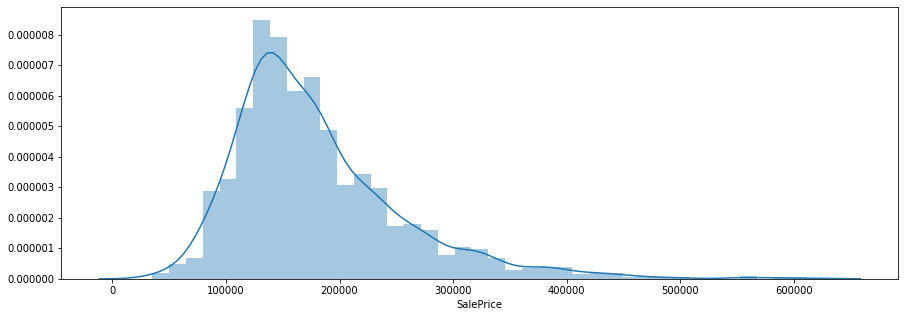

In [52]:
# Plot Target Variable 
plt.figure(figsize=(15,5))
sns.distplot(aus_house.SalePrice)
plt.show()

From the above distplot we can observed that the distribution of the target variable is little bit skewed at the right end. so we need to handle this, other wise some extreme data may alter the training set.Lets first check how much data is skewed.

In [53]:
# Checking Skewness of SalePrice
aus_house.SalePrice.skew()

1.4769500104100024

In [54]:
# Log trasform the Target Variable
aus_house['SalePrice'] = np.log(aus_house.SalePrice)
aus_house['SalePrice'].skew()

0.07278445551848643

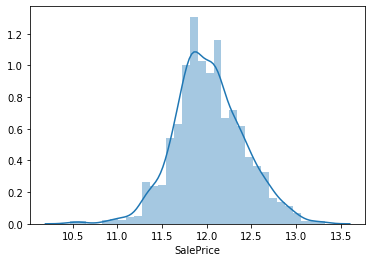

In [55]:
# Replotting..
sns.distplot(aus_house.SalePrice)
plt.show()

After logarithmic scaling for the skewness of Target Variable, Now the distribution is far more normal than the privious one.

In [56]:
aus_house.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,YearBuilt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,2,1,4,3,1,6,1,856,4,856,854,1710,1,0,2,1,3,1,2,8,0,2,2,548,3,3,0,61,0,12.247694,7,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,1,1,4,3,4,5,1,1262,4,1262,0,1262,0,1,2,0,3,1,1,6,1,2,2,460,3,3,298,0,0,12.109011,34,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,2,1,4,3,2,6,1,920,4,920,866,1786,1,0,2,1,3,1,2,6,1,2,2,608,3,3,0,42,0,12.317167,9,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,1,1,3,4,1,5,1,756,3,961,756,1717,1,0,1,0,3,1,2,7,1,1,3,6

### Train Test Split

In [57]:
df_train, df_test = train_test_split(aus_house, train_size=0.7, test_size=0.3, random_state=42)

In [58]:
# Scalling the train Dataset
col_for_scale = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','YearBuilt_age','YrSold_age']
scaler = StandardScaler()
df_train[col_for_scale] = scaler.fit_transform(df_train[col_for_scale])
df_test[col_for_scale] = scaler.transform(df_test[col_for_scale])

#### Splitting the dependent and Independent Variable

In [59]:
X_train = df_train
y_train = df_train.pop('SalePrice')

In [60]:
X_test = df_test
y_test = df_test.pop('SalePrice')

In [61]:
len(X_train.columns)

171

#### Lets apply RFE first. Because if directly apply GridSearchCv with 171 variable with 5 or 10 fold cross validation, it will take huge time to deliver the result. 

In [62]:
# Running RFE with the output number of variable for obtaining optimul number of feature
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=100, step=1, verbose=0)

In [63]:
# Creating Dataframe with allfeatures with RFE Ranking & Status
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_df.columns = ['Columns_Name', 'Status','Rank']
rfe_df.head()

,Columns_Name,Status,Rank
0,MSSubClass,False,72
1,LotFrontage,False,31
2,LotArea,False,54
3,LotShape,False,61
4,LandSlope,True,1


In [64]:
# Sorting those features that RFE support
rfe_true_df = list(rfe_df[rfe_df.Status==True].Columns_Name)

#### Filtering those features that RFE support to X_train & X_test

In [65]:
X_train = X_train[rfe_true_df]
X_test = X_test[rfe_true_df]

### Lasso Regression

In [66]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9137125356433557
0.8856597263350064


In [67]:
# Listing the coefficient with features
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 11.7),
 ('LotFrontage', 0.0),
 ('LotArea', 0.075),
 ('LotShape', 0.052),
 ('LandSlope', 0.005),
 ('OverallQual', 0.02),
 ('OverallCond', 0.033),
 ('MasVnrArea', 0.02),
 ('ExterQual', 0.0),
 ('ExterCond', 0.088),
 ('BsmtQual', 0.031),
 ('BsmtCond', 0.018),
 ('BsmtExposure', 0.017),
 ('BsmtFinType1', -0.022),
 ('BsmtFinType2', 0.033),
 ('TotalBsmtSF', 0.027),
 ('HeatingQC', 0.027),
 ('1stFlrSF', 0.025),
 ('2ndFlrSF', 0.02),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.002),
 ('BsmtHalfBath', -0.057),
 ('FullBath', 0.074),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.061),
 ('KitchenAbvGr', -0.0),
 ('KitchenQual', 0.005),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.02),
 ('GarageFinish', 0.038),
 ('GarageCars', -0.0),
 ('GarageArea', 0.0),
 ('GarageQual', 0.092),
 ('GarageCond', -0.05),
 ('WoodDeckSF', -0.067),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('YearBuilt_age', 0.06),
 ('YrSold_age', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.061),
 ('MSZoning_RL', 0.0),
 ('M

### Applying GridSearchCv for cross validation and try to improve model performace and also try to find optimul Lamda

In [68]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso,
                        param_grid= param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.097337,0.032680,0.002695,0.001002,0.0001,{'alpha': 0.0001},-0.078569,-0.077553,-0.091409,-0.087177,-0.080396,-0.079293,-0.083425,-0.086150,-0.082244,-0.080199,-0.082642,0.004186,1,-0.072782,-0.073405,-0.069963,-0.072752,-0.073205,-0.073269,-0.072841,-0.073077,-0.072998,-0.073198,-0.072749,0.000951
1,0.014167,0.001601,0.001697,0.000779,0.0010,{'alpha': 0.001},-0.078210,-0.075854,-0.099297,-0.088311,-0.081947,-0.081699,-0.090454,-0.086325,-0.078726,-0.074622,-0.083544,0.007230,2,-0.079349,-0.079452,-0.076490,-0.077861,-0.079356,-0.079111,-0.077685,-0.078476,-0.078493,-0.079766,-0.078604,0.000966
2,0.006579,0.000914,0.001696,0.000638,0.0100,{'alpha': 0.01},-0.097259,-0.085139,-0.120124,-0.103026,-0.089691,-0.085499,-0.101246,-0.096627,-0.087501,-0.076269,-0.094238,0.011659,3,-0.092185,-0.093266,-0.089019,-0.091606,-0.092171,-0.093095,-0.091982,-0.092080,-0.092995,-0.094026,-0.092242,0.001281
3,0.006481,0.001427,0.001995,0.000018,0.0500,{'alpha': 0.05},-0.125673,-0.108162,-0.142988,-0.146315,-0.107917,-0.118872,-0.130360,-0.116685,-0.110501,-0.104979,-0.121245,0.013997,4,-0.119860,-0.121454,-0.115242,-0.120118,-0.121614,-0.122226,-0.120703,-0.120083,-0.121018,-0.121240,-0.120356,0.001848
4,0.005685,0.000638,0.001496,0.000499,0.1000,{'alpha': 0.1},-0.155777,-0.143486,-0.175407,-0.188923,-0.141053,-0.162216,-0.162888,-0.144306,-0.141773,-0.135993,-0.155182,0.016308,5,-0.154369,-0.154027,-0.148890,-0.154495,-0.155557,-0.156489,-0.154832,-0.153623,-0.154640,-0.154645,-0.154157,0.001911


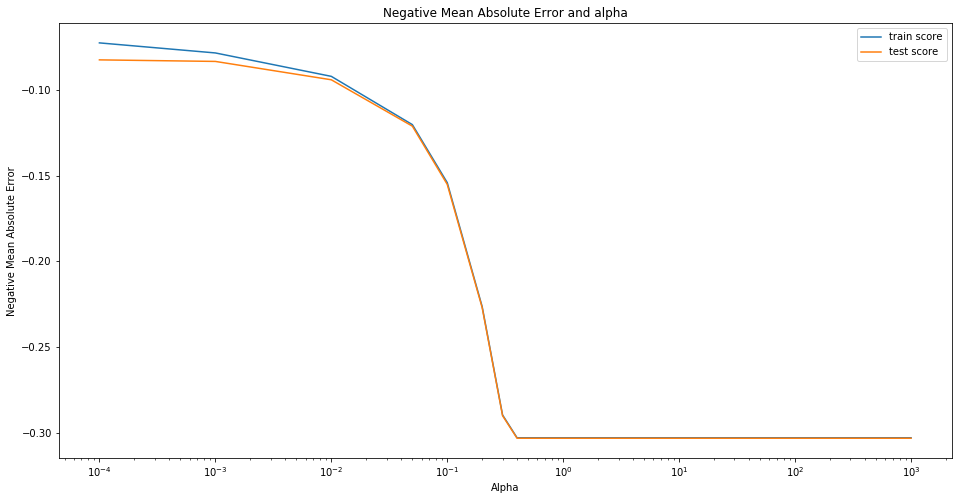

In [70]:
# Plotting Mean test and train score with alpha in a log scale
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [72]:
# Rechecking R2 Score with best alpha
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9296947197507122
0.8861150515473817


In [73]:
# Listing the lasso coefficient with feature
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [74]:
# Sorting lasso coef in descending order
lasso_coef.sort_values(by='Coef', ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.120368
22,FullBath,0.370167
24,BedroomAbvGr,0.309660
23,HalfBath,0.267337
25,KitchenAbvGr,0.263683
40,MSZoning_RH,0.162504
93,RoofStyle_Gable,0.138533
32,GarageQual,0.138316
37,YearBuilt_age,0.115123
73,Neighborhood_Veenker,0.091741


#### As per subjective question requiremt I am changing the alpha value and make it double to check what changes the model return

In [75]:
# Make the optimul alpha double
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9264090019813982
0.8876780730848044


In [76]:
# Listing the coefficient after double the alpha value
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [77]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.364796
22,FullBath,0.244118
24,BedroomAbvGr,0.187626
40,MSZoning_RH,0.148259
23,HalfBath,0.139192
25,KitchenAbvGr,0.136480
32,GarageQual,0.129848
37,YearBuilt_age,0.104813
9,ExterCond,0.092817
93,RoofStyle_Gable,0.088173


So after double the value of alpha, what we have found that there is no as such significant change in the R2 Score or Coefficient of features by applying Lasso. Just only one changes is seen. By applying optimul value of alpha, the top 10 features we got along with their coef is slightly change when we double the value of alpha. One feature i.e `ExterCond` replace the feature i.e `Neighborhood_Veenker`, which was present in the optimul value of alpha..

## Ridge Regression

In [78]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9319208552092093
0.879546802199421


##### Lets try to improve the model performace with optimul alpha value using GridSearchCv

In [79]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

model_cv = GridSearchCV(estimator= ridge,
                       param_grid= param,
                       cv= folds,
                       scoring= 'neg_mean_absolute_error',
                       verbose=1,
                       return_train_score=True)

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006783,0.001396,0.002293,0.000639,0.0001,{'alpha': 0.0001},-0.079475,-0.080280,-0.092466,-0.085037,-0.079841,-0.081128,-0.084308,-0.088474,-0.082637,-0.087373,-0.084102,0.004073,24,-0.072181,-0.072420,-0.068566,-0.071578,-0.072277,-0.072470,-0.072020,-0.072036,-0.072040,-0.071593,-0.071718,0.001089
1,0.005686,0.001414,0.002192,0.000397,0.0010,{'alpha': 0.001},-0.079476,-0.080275,-0.092456,-0.085050,-0.079828,-0.081108,-0.084305,-0.088463,-0.082638,-0.087331,-0.084093,0.004069,23,-0.072180,-0.072419,-0.068566,-0.071581,-0.072277,-0.072470,-0.072020,-0.072036,-0.072040,-0.071597,-0.071719,0.001088
2,0.007380,0.002148,0.002791,0.000599,0.0100,{'alpha': 0.01},-0.079485,-0.080225,-0.092352,-0.085174,-0.079710,-0.080915,-0.084273,-0.088358,-0.082643,-0.086919,-0.084005,0.004039,22,-0.072175,-0.072418,-0.068569,-0.071606,-0.072277,-0.072463,-0.072019,-0.072041,-0.072037,-0.071628,-0.071723,0.001086
3,0.006084,0.001297,0.002293,0.000898,0.0500,{'alpha': 0.05},-0.079511,-0.080037,-0.091931,-0.085596,-0.079267,-0.080164,-0.084102,-0.087962,-0.082652,-0.085272,-0.083649,0.003954,21,-0.072152,-0.072438,-0.068580,-0.071704,-0.072343,-0.072439,-0.072012,-0.072107,-0.072038,-0.071757,-0.071757,0.001086
4,0.006583,0.001354,0.001993,0.000772,0.1000,{'alpha': 0.1},-0.079514,-0.079838,-0.091520,-0.085950,-0.079015,-0.079435,-0.083854,-0.087667,-0.082646,-0.083554,-0.083299,0.003925,20,-0.072172,-0.072518,-0.068592,-0.071801,-0.072445,-0.072438,-0.072086,-0.072191,-0.072099,-0.071904,-0.071824,0.001100


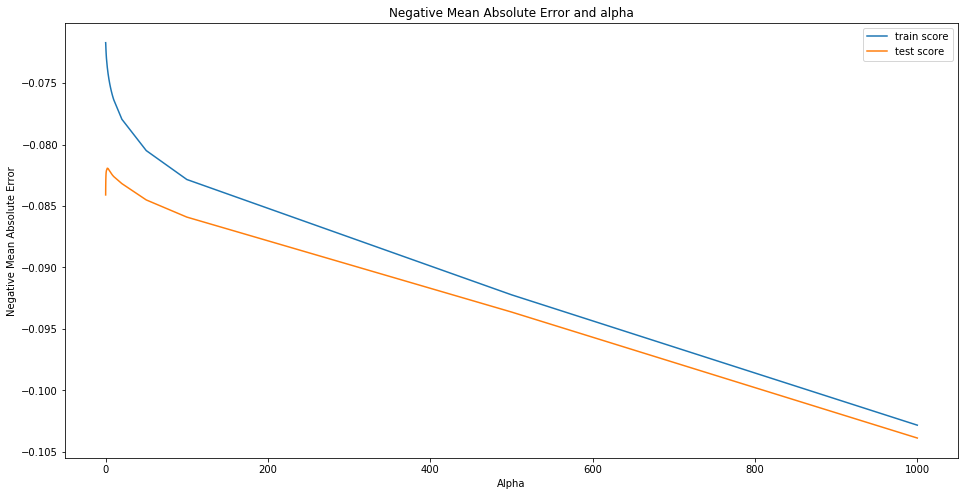

In [81]:
# Plotting Mean test and train score with alpha
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [82]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

In [83]:
# Rechecking R2 Score with best alpha
ridge = Ridge(alpha=2.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9273987190599731
0.8850855728179161


In [84]:
# Listing the Ridge coefficient with feature
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']

In [85]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.297313
22,FullBath,0.182363
40,MSZoning_RH,0.144713
32,GarageQual,0.136158
24,BedroomAbvGr,0.131716
37,YearBuilt_age,0.106678
93,RoofStyle_Gable,0.094417
23,HalfBath,0.087321
25,KitchenAbvGr,0.086733
73,Neighborhood_Veenker,0.081527


In [86]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.364796
22,FullBath,0.244118
24,BedroomAbvGr,0.187626
40,MSZoning_RH,0.148259
23,HalfBath,0.139192
25,KitchenAbvGr,0.136480
32,GarageQual,0.129848
37,YearBuilt_age,0.104813
9,ExterCond,0.092817
93,RoofStyle_Gable,0.088173


##### As per subjective question requiremt I am changing the alpha value and make it double to check what changes the model return

In [87]:
# Making the optimul alpha double
ridge = Ridge(alpha=4.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9249500459972185
0.8859007457833071


In [88]:
# Listing the coef with double alpha value
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']

In [89]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.420197
22,FullBath,0.126075
40,MSZoning_RH,0.123055
32,GarageQual,0.122885
37,YearBuilt_age,0.094684
24,BedroomAbvGr,0.083759
42,MSZoning_RM,0.072177
55,Neighborhood_Crawfor,0.067974
28,Fireplaces,0.067414
75,Condition1_Norm,0.066720


After doubling the value of alpha in Ridge, There is no as such significant change in R2 Score. But in coefficeient listing some new features become significant when we double the value of alpha. That are - `MSZoning_RM`, `Neighborhood_Crawfor`, `Fireplaces`,`Condition1_Norm`. This features were not present in the previous one with optimum alpha value.

**So after applying Ridge & Lasso regession, it is clear that in both regression model the R2 Score are more or less similar. But as we know that Lasso will penalize features which are less important and help in selecting the significant features, so I will select Lasso for my final model.**

### Final Model

In [90]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9296947197507122
0.8861150515473817


As the Alpha value in Scikit Learn is nothing but the theoritical Lambda, so we have got the **optimul Lambda value** after performing Lasso & Ridge regression are:

- **Lasso Regression = 0.0001**
- **Ridge Regression = 2.0**

**Based on the Lasso & Ridge Regression, the key variables that significantly impact on the Sale Price of houses in Australian Culture are listed below:-**
(Note - Here I am listing first 10 Features not the all)

- **MSSubClass**
- **FullBath**
- **BedroomAbvGr**
- **HalfBath**
- **KitchenAbvGr**
- **MSZoning_RH**
- **RoofStyle_Gable**
- **GarageQual**
- **YearBuilt_age**
- **Neighborhood_Veenker**

Based on our final model(Lasso) we find the **R2 Score for train set is 92.96(roughly-93%)** and **for Test set is 88.61(roughly= 89%)**, which is quite good. R2 Score is basically the measurment of how well the features are been predicted by the model. So from the above score it can say that the features are well described by the model for predicting Sale Price

## As per the subjective Question requirement( Question no= 3)

In [91]:
aus_house.shape

(1365, 172)

In [94]:
aus_house_dupli = aus_house.drop(['MSSubClass','FullBath','BedroomAbvGr','HalfBath','KitchenAbvGr'], axis=1)

In [95]:
aus_house_dupli.shape

(1365, 167)

In [96]:
df_train, df_test = train_test_split(aus_house_dupli, train_size=0.7, test_size=0.3, random_state=42)

In [98]:
# Scalling the train Dataset
col_for_scale = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','BsmtHalfBath','TotRmsAbvGrd',
                'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','YearBuilt_age','YrSold_age']
scaler = StandardScaler()
df_train[col_for_scale] = scaler.fit_transform(df_train[col_for_scale])
df_test[col_for_scale] = scaler.transform(df_test[col_for_scale])

In [99]:
X_train = df_train
y_train = df_train.pop('SalePrice')

In [102]:
X_test = df_test
y_test = df_test.pop('SalePrice')

In [106]:
X_train.shape

(955, 166)

In [105]:
X_test.shape

(410, 166)

In [107]:
# Running RFE with the output number of variable for obtaining optimul number of feature
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,100)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=100, step=1, verbose=0)

In [108]:
# Creating Dataframe with allfeatures with RFE Ranking & Status
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_df.columns = ['Columns_Name', 'Status','Rank']
rfe_df.head()

,Columns_Name,Status,Rank
0,LotFrontage,False,58
1,LotArea,False,19
2,LotShape,False,49
3,LandSlope,False,13
4,OverallQual,True,1


In [109]:
# Sorting those features that RFE support
rfe_true_df = list(rfe_df[rfe_df.Status==True].Columns_Name)

**Filtering Those features that RFE support**

In [112]:
X_train = X_train[rfe_true_df]
X_test = X_test[rfe_true_df]

### Lasso Regrassion

In [113]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9065320637433997
0.8847900839067191


In [114]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('LotFrontage', 11.672),
 ('LotArea', 0.091),
 ('LotShape', 0.051),
 ('LandSlope', 0.023),
 ('OverallQual', 0.033),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.132),
 ('ExterQual', 0.034),
 ('ExterCond', 0.032),
 ('BsmtQual', 0.039),
 ('BsmtCond', 0.005),
 ('BsmtExposure', -0.069),
 ('BsmtFinType1', 0.088),
 ('BsmtFinType2', 0.0),
 ('TotalBsmtSF', 0.078),
 ('HeatingQC', -0.0),
 ('1stFlrSF', 0.011),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.028),
 ('BsmtFullBath', 0.037),
 ('BsmtHalfBath', -0.0),
 ('KitchenQual', 0.0),
 ('TotRmsAbvGrd', 0.023),
 ('Fireplaces', 0.0),
 ('GarageFinish', 0.107),
 ('GarageCars', -0.06),
 ('GarageArea', -0.0),
 ('GarageQual', -0.04),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.074),
 ('EnclosedPorch', 0.0),
 ('YearBuilt_age', 0.002),
 ('YrSold_age', 0.053),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.066),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulD

In [115]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso,
                        param_grid= param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [116]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.077193,0.016850,0.002095,0.000538,0.0001,{'alpha': 0.0001},-0.079033,-0.077581,-0.094273,-0.084498,-0.082391,-0.084191,-0.090892,-0.090120,-0.084926,-0.081204,-0.084911,0.005095,1,-0.074516,-0.075573,-0.071801,-0.075353,-0.074969,-0.074468,-0.073874,-0.073941,-0.074084,-0.074916,-0.074350,0.001010
1,0.016358,0.002503,0.001895,0.000537,0.0010,{'alpha': 0.001},-0.081012,-0.080271,-0.100373,-0.089330,-0.085058,-0.083631,-0.097610,-0.091736,-0.086476,-0.079352,-0.087485,0.006870,2,-0.083145,-0.083359,-0.080695,-0.082085,-0.083114,-0.082703,-0.081199,-0.081757,-0.082026,-0.083072,-0.082316,0.000864
2,0.006592,0.001354,0.001786,0.000601,0.0100,{'alpha': 0.01},-0.098682,-0.091059,-0.124303,-0.109614,-0.096702,-0.092052,-0.112025,-0.101514,-0.097631,-0.080594,-0.100418,0.011688,3,-0.099684,-0.100046,-0.096249,-0.098828,-0.098576,-0.100078,-0.098067,-0.099031,-0.099303,-0.101218,-0.099108,0.001276
3,0.010674,0.004572,0.002790,0.000399,0.0500,{'alpha': 0.05},-0.124280,-0.111563,-0.149848,-0.151218,-0.115662,-0.124947,-0.138266,-0.123103,-0.117672,-0.104760,-0.126132,0.014843,4,-0.125467,-0.126697,-0.120118,-0.125396,-0.125813,-0.126958,-0.124990,-0.124960,-0.125909,-0.127017,-0.125333,0.001881
4,0.007879,0.001218,0.002392,0.000662,0.1000,{'alpha': 0.1},-0.154997,-0.145677,-0.179425,-0.191652,-0.144099,-0.164299,-0.165896,-0.147495,-0.144146,-0.136866,-0.157455,0.016714,5,-0.157619,-0.156867,-0.151699,-0.156773,-0.157685,-0.158726,-0.156562,-0.156078,-0.156859,-0.157561,-0.156643,0.001792


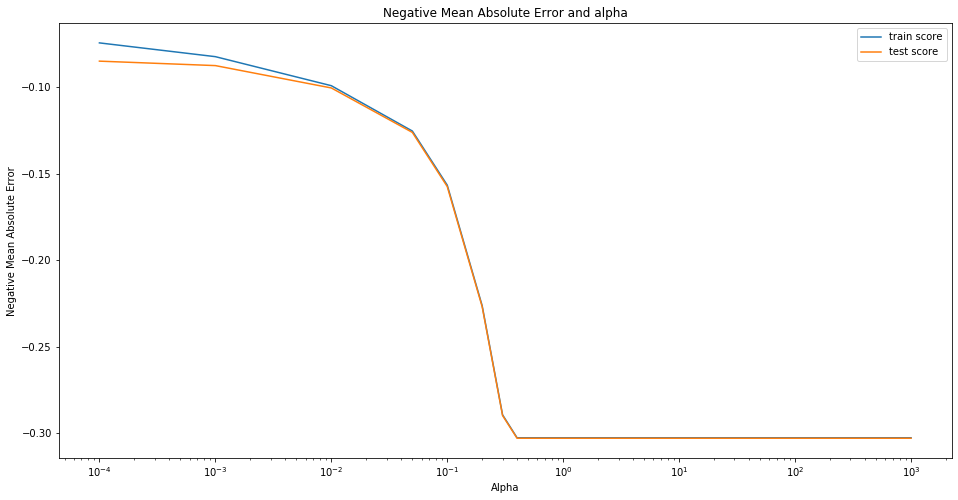

In [117]:
# Plotting Mean test and train score with alpha in a log scale
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [118]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [119]:
# Rechecking R2 Score with best alpha
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9243612091304687
0.8808208082283694


In [120]:
# Listing the lasso coefficient with feature
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [121]:
# Sorting lasso coef in descending order
lasso_coef.sort_values(by='Coef', ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,11.087402
12,BsmtFinType1,0.393224
14,TotalBsmtSF,0.335065
15,HeatingQC,0.274373
13,BsmtFinType2,0.263820
24,GarageFinish,0.161522
33,YrSold_age,0.157475
30,OpenPorchSF,0.129790
53,Neighborhood_IDOTRR,0.105775
94,Exterior1st_BrkComm,0.102858
